In [109]:
import numpy as np
import pandas as bp
import pylab as P
import numba
import bootstrap
reload(bootstrap)

<module 'bootstrap' from 'bootstrap.py'>

In [3]:

%time log_data = bp.read_csv("data_0926/favcnt0919-0923000", header = None, names=["date", "exp_name", "actid", "country_code", "num_fav", "total"])

CPU times: user 2.26 s, sys: 164 ms, total: 2.43 s
Wall time: 3.1 s


In [72]:
log_data

,date,exp_name,actid,country_code,num_fav,total
0,2015-09-19,lrfix,247907122,2,0,886
1,2015-09-20,nearby,1808431520,236,259,2502
2,2015-09-19,lrfix,1770203010,54,0,1640
3,2015-09-21,nearby,581455948,47,6,269
4,2015-09-19,lrfix,1427731592,18,0,60
5,2015-09-19,lrfix,201157350,18,0,479
6,2015-09-21,nearby,2155614332,13,3,1134
7,2015-09-23,lrfix,1451340220,1,5,91
8,2015-09-23,lrfix,1559075672,54,1,118
9,2015-09-19,lrfix,547424481,54,14,56


In [12]:
float(np.sum(log_data["num_fav"].values))/np.sum(log_data["total"].values)

0.014542369669285493

In [73]:
#def bootstrap(data, num_samples, statistics, fields):
#fields = ["num_fav","total"]
#data = log_data[fields].values
#data_size = len(data)
#values = []
#for i in range(5000):
#    data_sum = data[np.random.randint(0, data_size,  data_size)]
#    fval = np.sum(data_sum, 0)
#    values.append(float(fval[0])/fval[1])
#values
#np.random.choice(data, (10, len(data)), replace=True)
@numba.jit
def fav_ratio(x):
    fval = np.sum(x, 0)
    return float(fval[0])/fval[1]
%time bootstrap_total = bootstrap.bootstrap(log_data[["num_fav","total"]].values, 1000, fav_ratio)


CPU times: user 7min 24s, sys: 8.46 s, total: 7min 33s
Wall time: 7min 33s


In [74]:
bootstrap_lrfix = bootstrap.bootstrap(log_data[log_data["exp_name"] == "lrfix"][["num_fav","total"]].values, 1000, fav_ratio)

In [75]:
bootstrap_lr = bootstrap.bootstrap(log_data[log_data["exp_name"] == "lr"][["num_fav","total"]].values, 1000, fav_ratio)

In [77]:
bootstrap_nearby = bootstrap.bootstrap(log_data[log_data["exp_name"] == "nearby"][["num_fav","total"]].values, 1000, fav_ratio)

/home/max/local/home/max/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


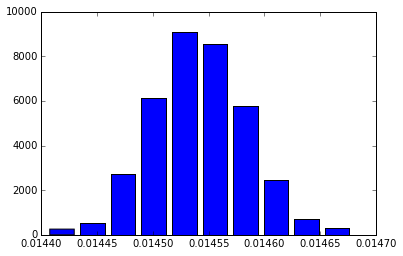

In [82]:
%matplotlib inline
P.figure()
n, bins, patches = P.hist(bootstrap_total, normed=True, histtype='bar', rwidth=0.8)

P.show()


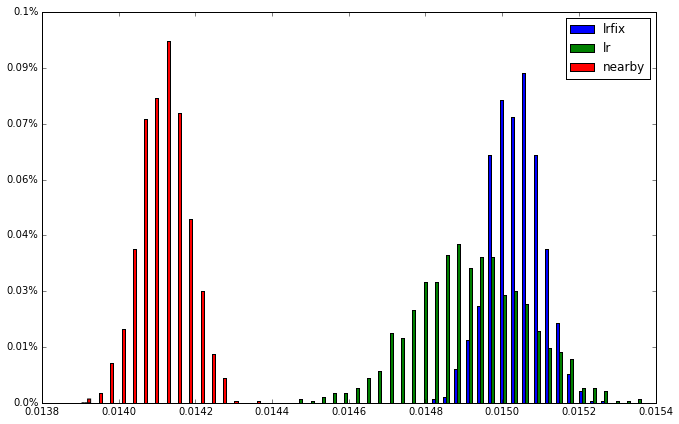

In [88]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
P.rcParams['figure.figsize'] = (11, 7)
P.figure()
n, bins, patches = P.hist([bootstrap_lrfix, bootstrap_lr, bootstrap_nearby], bins=50, normed=True, histtype='bar', label=["lrfix", "lr", "nearby"])
# To plot correct percentages in the y axis     
to_percentage = lambda y, pos: str(round( ( y / float(len(data)) ) * 100.0, 2)) + '%'
P.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))
P.legend()
P.show()

In [92]:
log_data[(log_data["exp_name"] == "lrfix") &(log_data["date"] == "2015-09-23")]

,date,exp_name,actid,country_code,num_fav,total
7,2015-09-23,lrfix,1451340220,1,5,91
8,2015-09-23,lrfix,1559075672,54,1,118
11,2015-09-23,lrfix,2350115400,128,34,404
82,2015-09-23,lrfix,443879547,1,0,493
84,2015-09-23,lrfix,205819166,54,0,37
89,2015-09-23,lrfix,2349072114,54,0,54
91,2015-09-23,lrfix,1716818670,134,0,50
99,2015-09-23,lrfix,907814662,205,0,5
101,2015-09-23,lrfix,939607460,1,0,8
108,2015-09-23,lrfix,2306896080,145,1,2


In [97]:
bootstrap_lrfix_0920 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "lrfix")&(log_data["date"] == "2015-09-23")][["num_fav","total"]].values, 1000, fav_ratio)
bootstrap_lrfix_0921 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "lrfix")&(log_data["date"] == "2015-09-21")][["num_fav","total"]].values, 1000, fav_ratio)
bootstrap_lrfix_0922 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "lrfix")&(log_data["date"] == "2015-09-22")][["num_fav","total"]].values, 1000, fav_ratio)

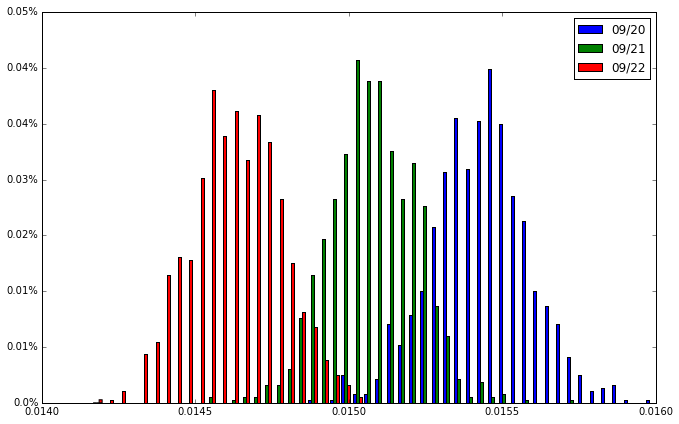

In [98]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
P.rcParams['figure.figsize'] = (11, 7)
P.figure()
n, bins, patches = P.hist([bootstrap_lrfix_0920, bootstrap_lrfix_0921, bootstrap_lrfix_0922], bins=50, normed=True, histtype='bar', label=["09/20", "09/21", "09/22"])
# To plot correct percentages in the y axis     
to_percentage = lambda y, pos: str(round( ( y / float(len(data)) ) * 100.0, 2)) + '%'
P.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))
P.legend()
P.show()

In [117]:
print bootstrap.interval(bootstrap_lrfix_0920, 0.05), np.average(bootstrap_lrfix_0920), np.std(bootstrap_lrfix_0920)
print bootstrap.interval(bootstrap_lrfix_0921, 0.05), np.average(bootstrap_lrfix_0921), np.std(bootstrap_lrfix_0921)
print bootstrap.interval(bootstrap_lrfix_0922, 0.05), np.average(bootstrap_lrfix_0922), np.std(bootstrap_lrfix_0922)

(0.015120788271132252, 0.015751419406154227) 0.015432309228 0.000160115378295
(0.014818577906093576, 0.015339658529557813) 0.0150778184894 0.000141365662221
(0.014353255694163965, 0.014923451169835322) 0.0146283826932 0.000143754406025


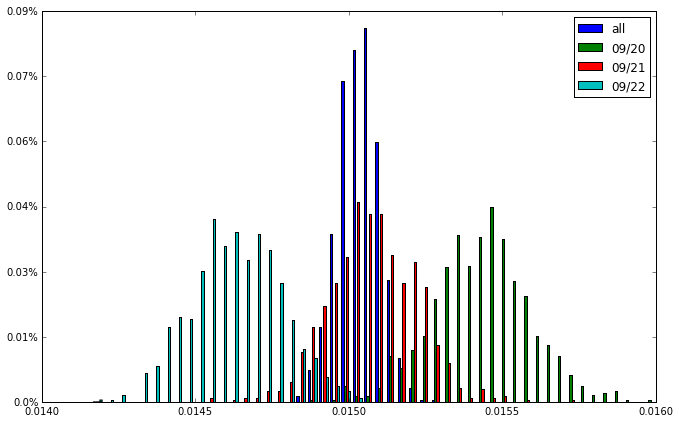

In [115]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
P.rcParams['figure.figsize'] = (11, 7)
P.figure()
n, bins, patches = P.hist([bootstrap_lrfix, bootstrap_lrfix_0920, bootstrap_lrfix_0921, bootstrap_lrfix_0922], bins=50, normed=True, histtype='bar', label=["all", "09/20", "09/21", "09/22"])
# To plot correct percentages in the y axis     
to_percentage = lambda y, pos: str(round( ( y / float(len(data)) ) * 100.0, 2)) + '%'
P.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))
P.legend()
P.show()

In [99]:
bootstrap_nearby_0920 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "nearby")&(log_data["date"] == "2015-09-23")][["num_fav","total"]].values, 1000, fav_ratio)
bootstrap_nearby_0921 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "nearby")&(log_data["date"] == "2015-09-21")][["num_fav","total"]].values, 1000, fav_ratio)
bootstrap_nearby_0922 = bootstrap.bootstrap(log_data[(log_data["exp_name"] == "nearby")&(log_data["date"] == "2015-09-22")][["num_fav","total"]].values, 1000, fav_ratio)

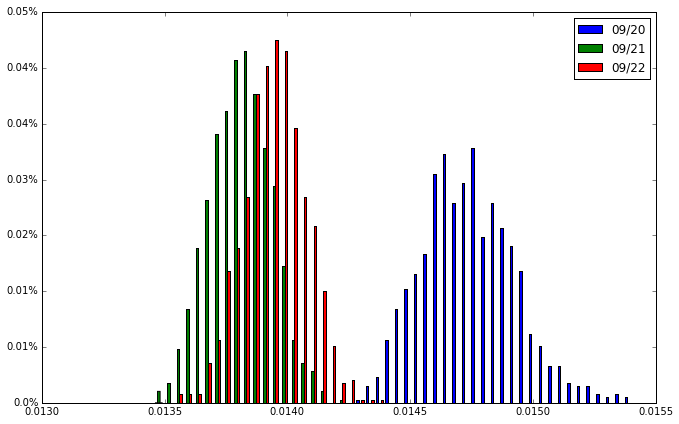

In [100]:
%matplotlib inline
from matplotlib.ticker import FuncFormatter
P.rcParams['figure.figsize'] = (11, 7)
P.figure()
n, bins, patches = P.hist([bootstrap_nearby_0920, bootstrap_nearby_0921, bootstrap_nearby_0922], bins=50, normed=True, histtype='bar', label=["09/20", "09/21", "09/22"])
# To plot correct percentages in the y axis     
to_percentage = lambda y, pos: str(round( ( y / float(len(data)) ) * 100.0, 2)) + '%'
P.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage))
P.legend()
P.show()